In [0]:
# Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error


In [0]:
# Importing and loading the dataset
d = pd.read_csv('supermarket_sales.csv')
d.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [0]:
# checking for null values
d.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

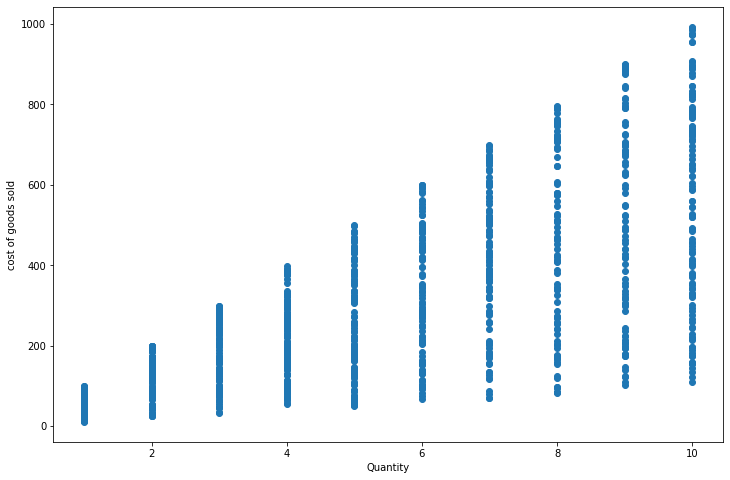

In [0]:
# Checking for outliers
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(d['Quantity'], d['cogs'])
ax.set_xlabel('Quantity')
ax.set_ylabel('cost of goods sold')
plt.show()

In [0]:
#Creating the supermarket dataframe 
supermarket = pd.DataFrame(d, columns =['Product line','Quantity','Date','cogs','Customer type','City'] )
supermarket.head()

,Product line,Quantity,Date,cogs,Customer type,City
0,Health and beauty,7,1/5/2019,522.83,Member,Yangon
1,Electronic accessories,5,3/8/2019,76.40,Normal,Naypyitaw
2,Home and lifestyle,7,3/3/2019,324.31,Normal,Yangon
3,Health and beauty,8,1/27/2019,465.76,Member,Yangon
4,Sports and travel,7,2/8/2019,604.17,Normal,Yangon


In [0]:
#Creating new columns
supermarket['month'] = pd.DatetimeIndex(supermarket['Date']).month
# supermarket = supermarket.set_index('month')
supermarket['Date'] = pd.to_datetime(supermarket['Date'])
supermarket['day'] = supermarket['Date'].dt.day 
# supermarket = supermarket.groupby('day')['Quantity'].sum().reset_index()
# data1.head() 
# supermarket.head()

(1, 3)

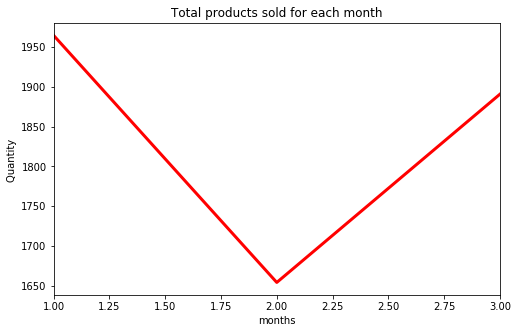

In [0]:
# Plot for total sales for three months
data_total = pd.DataFrame(supermarket.groupby('month')['Quantity'].sum().reset_index())

plt.figure(figsize=(8,5))
sns.lineplot(x='month', y='Quantity', data=data_total, color='red', lw=3)
plt.xlabel('months')
plt.ylabel('Quantity ')
plt.title('Total products sold for each month', fontsize=12)
plt.xlim(1,3)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

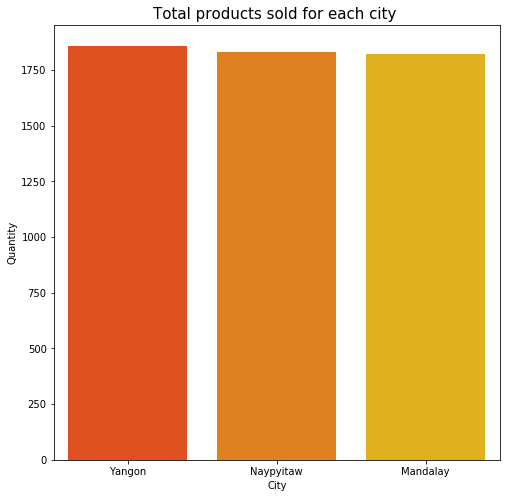

In [0]:
#Plot of total sales for all three city for further analysis
data_city = pd.DataFrame(supermarket.groupby('City')['Quantity'].sum().sort_values(ascending=False).reset_index())
# data3['state'].iloc[12] = 'Para'
plt.figure(figsize=(8,8))
sns.barplot(data=data_city, x='City', y='Quantity', palette='autumn')
plt.title('Total products sold for each city ', fontsize=15)
plt.xlabel('City')
plt.ylabel('Quantity')
plt.xticks(rotation=360)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text xticklabel objects>)

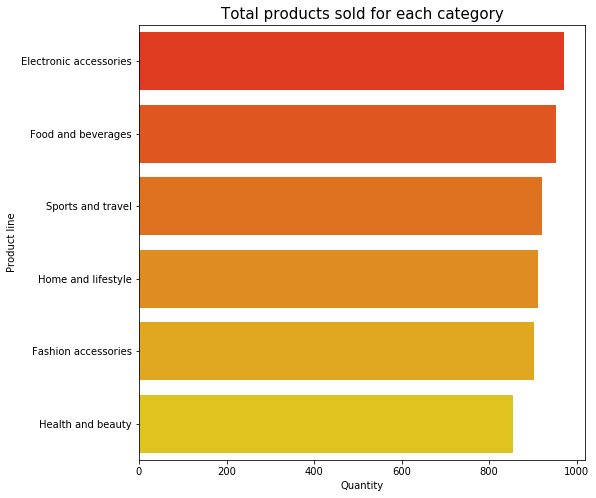

In [0]:
#Total sales for each category
data_category = pd.DataFrame(supermarket.groupby('Product line')['Quantity'].sum().sort_values(ascending=False).reset_index())
# data3['state'].iloc[12] = 'Para'
plt.figure(figsize=(8,8))
sns.barplot(data=data_category, x='Quantity', y='Product line', palette='autumn')
plt.title('Total products sold for each category', fontsize=15)
plt.xlabel('Quantity')
plt.ylabel('Product line')
plt.xticks(rotation=360)

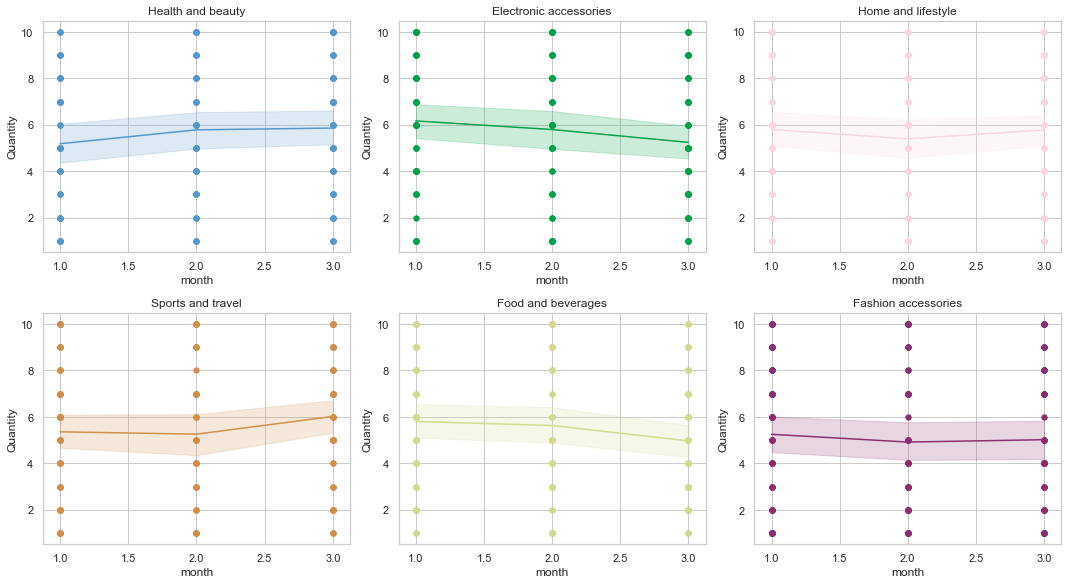

In [0]:
#Plot of sales for three months for each category
import matplotlib.pyplot as plt
import seaborn as sns
import random
product_line = supermarket['Product line'].unique()
product_line
sns.set(style='whitegrid')
plt.figure(figsize=(15,20))
count=1
for product in product_line:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(supermarket[supermarket['Product line']==product]['month'],
                 supermarket[supermarket['Product line']==product]['Quantity'],
                 color=col)
    plt.scatter(supermarket[supermarket['Product line']==product]['month'],
                 supermarket[supermarket['Product line']==product]['Quantity'],
                color=col,
                s=28)
    plt.title(product)
plt.tight_layout()
plt.show()

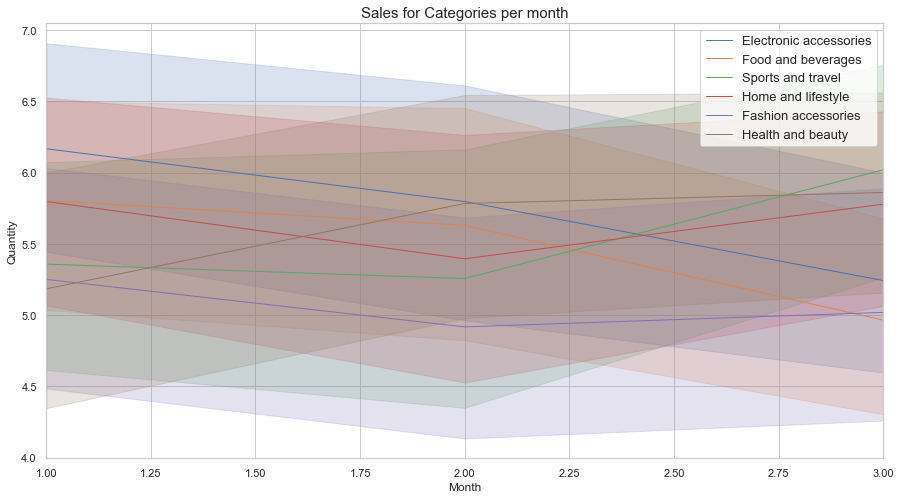

In [0]:
#Summarizng the above analysis considering all the categories,months and quantity
df1 = pd.DataFrame(supermarket[supermarket['Product line'] =='Electronic accessories'])
df2 = pd.DataFrame(supermarket[supermarket['Product line'] =='Food and beverages'])
df3 = pd.DataFrame(supermarket[supermarket['Product line'] =='Sports and travel'])
df4 = pd.DataFrame(supermarket[supermarket['Product line'] =='Home and lifestyle'])
df5 = pd.DataFrame(supermarket[supermarket['Product line'] =='Fashion accessories'])
df6 = pd.DataFrame(supermarket[supermarket['Product line'] =='Health and beauty'])


plt.figure(figsize=(15,8))

df_list = [df1,df2,df3,df4,df5,df6]
df_group = []
for x in df_list:
    x.groupby('month')['Quantity'].sum().reset_index()
    df_group.append(x)

for x in df_group:
    sns.lineplot(x='month', y='Quantity', data=x, lw=1, label=x['Product line'].iloc[0])
    plt.title('Sales for Categories per month', fontsize=15)
    plt.xlabel('Month')
    plt.ylabel('Quantity')
    # plt.xticks(np.arange(1,3,1), rotation=80)
    plt.xlim(1,3)

plt.legend(fontsize=13)

**Baseline model** **creation**

In [0]:
#Importing the required libraries 
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


data  = pd.read_csv('supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [0]:
data['Date'] = pd.to_datetime(data['Date'])
data['day'] = data['Date'].dt.day 
data1 = data.groupby('Date')['Quantity'].sum().reset_index()
data1.head() 

,Date,Quantity
0,2019-01-01,81
1,2019-01-02,48
2,2019-01-03,37
3,2019-01-04,32
4,2019-01-05,55


In [0]:
#Converting the dates column in integer format for analysis
import matplotlib.dates as mdates

data1['Date2num'] = data1['Date'].apply(lambda x: mdates.date2num(x))
date = data1.loc[:, ['Date']]
del data1['Date']

In [0]:
data1.head()

,Quantity,Date2num
0,81,737060.0
1,48,737061.0
2,37,737062.0
3,32,737063.0
4,55,737064.0


In [0]:
#Assigning the features and target 
X = data1['Date2num']
y = data1['Quantity']
# Make test and training split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.3,random_state=0)

In [0]:
# Create a dummy regressor
dummy_mean = DummyRegressor(strategy='mean')

# "Train" dummy regressor
dummy_mean.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [0]:
#Dummy mean score
dummy_mean.score(X_test,y_test)

-0.06803986135182893

In [0]:
#Mean squared error
rom sklearn.metrics import mean_squared_error

prediction=[]
for i in range(len(X_test)):
    y_pred=dummy_mean.predict(X_test.iloc[[i]])
    prediction.append(y_pred)

# print(y_pred)
test_score = mean_squared_error(y_test, prediction)
print('Test MSE: %.3f' % test_score)

Test MSE: 560.834
